In [1]:
from tqdm import tqdm

In [2]:
V=[#'results/variant_predictions/A:Alberta:01:2020_(H1N2)v/',
 'results/variant_predictions/A:Bretagne:24241:2021/',
 'results/variant_predictions/A:California:71:2021/',
 'results/variant_predictions/A:Hessen:47:2020/',
 'results/variant_predictions/A:Hunan:42443:2015/',
 'results/variant_predictions/A:Iowa:32:2016/',
 'results/variant_predictions/A:Iowa:39:2015/',
 'results/variant_predictions/A:Michigan:383:2018/',
 'results/variant_predictions/A:Minnesota:19:2011/',
 #'results/variant_predictions/A:Minnesota:45:2016/',
 'results/variant_predictions/A:Netherlands:10370-1b:2020/',
 'results/variant_predictions/A:Netherlands:3315:2016/',
 'results/variant_predictions/A:Ohio:09:2015/',
 'results/variant_predictions/A:Ohio:24:2017/',
 'results/variant_predictions/A:Ohio:35:2017/',
 #'results/variant_predictions/A:Parana:720:2015/',
 #'results/variant_predictions/A:Taiwan:1:2021/',
 'results/variant_predictions/A:Wisconsin:03:2021/',
'results/variant_predictions/A:Wisconsin:71:2016/']

In [3]:
import pandas as pd
import numpy as np
from emergenet.emergenet import predict_irat_emergence
RESULT_DIR = 'results/variant_predictions/'
import glob

R=None
Rh=None
Rl=None
num=1
for T in tqdm([0,1,3,6,12]):
    E=[]
    Eh=[]
    El=[]
    for v in V:
        FILESh=glob.glob(v+str(T)+'/results/H*csv')
        FILESn=glob.glob(v+'1/results/N*csv')
        har=pd.concat([pd.read_csv(i) for i in FILESh]).sort_values('risk')
        nar=pd.concat([pd.read_csv(i) for i in FILESn]).sort_values('risk')
        har=har[har.risk>0]
        nar=nar[nar.risk>0]
        a=har.head(num).risk.mean()
        b=nar.head(num).risk.mean()
        E=np.append(E,predict_irat_emergence(a,b)[0])
        Eh=np.append(Eh,predict_irat_emergence(a,b)[2])
        El=np.append(El,predict_irat_emergence(a,b)[1])

    if R is None:
        R=pd.DataFrame(E,V,columns=['t'+str(T)]).sort_values('t'+str(T))
        Rh=pd.DataFrame(Eh,V,columns=['t'+str(T)]).sort_values('t'+str(T))
        Rl=pd.DataFrame(El,V,columns=['t'+str(T)]).sort_values('t'+str(T))
    else:
        R=R.join(pd.DataFrame(E,V,columns=['t'+str(T)]).sort_values('t'+str(T)))
        Rh=Rh.join(pd.DataFrame(Eh,V,columns=['t'+str(T)]).sort_values('t'+str(T)))
        Rl=Rl.join(pd.DataFrame(El,V,columns=['t'+str(T)]).sort_values('t'+str(T)))




100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.01s/it]


In [18]:
# Function to ensure non-decreasing order in rows
def make_non_decreasing(row):
    for i in range(1, len(row)):
        if row[i] < row[i-1]:
            row[i] = row[i-1]
    return row

R=R[['t12','t6','t3','t1','t0']]
df = R.apply(make_non_decreasing, axis=1)
df.columns=[x.replace('t','') for x in df.columns]
df.index=[x.split('/')[-2].replace(':','/') for x in df.index.values]

In [19]:

Rl=Rl[['t12','t6','t3','t1','t0']]
dfl = Rh.apply(make_non_decreasing, axis=1)
dfl.columns=[x.replace('t','') for x in df.columns]
dfl.index=[x.split('/')[-2].replace(':','/') for x in dfl.index.values]

Rh=Rh[['t12','t6','t3','t1','t0']]
dfh = Rh.apply(make_non_decreasing, axis=1)
dfh.columns=[x.replace('t','') for x in df.columns]
dfh.index=[x.split('/')[-2].replace(':','/') for x in dfh.index.values]

In [20]:
import pylab as plt
plt.style.use('fivethirtyeight')
def customize_plot(ax, font_size=16, color_palette=['slateblue', 'seagreen','red', 'black', 'mediumblue']):
    """
    Customize a matplotlib axes object with specified font sizes and color palette.
    
    Parameters:
    ax (matplotlib.axes.Axes): The axes object to customize.
    font_sizes (dict): A dictionary containing font sizes for 'title', 'axes_labels', 'ticks', and 'legend'.
    color_palette (list): A list of colors to use for the lines in the plot.
    """
    # Setting font sizes for the axes labels and ticks
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)
    ax.set_title(ax.get_title(), fontsize=font_size)
    ax.tick_params(axis='both', labelsize=font_size)
    
    # Setting the colors from the color palette
    if color_palette is not None:
        lines = ax.get_lines()
        for line, color in zip(lines, color_palette):
            line.set_color(color)

    # Placing the legend outside of the axes
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=font_size)
    ax.set_ylabel('emergence score',fontsize=font_size)
    ax.set_xlabel('time to collection [months]',fontsize=font_size)

    # Adjust the layout to accommodate changes
    plt.gcf().tight_layout()


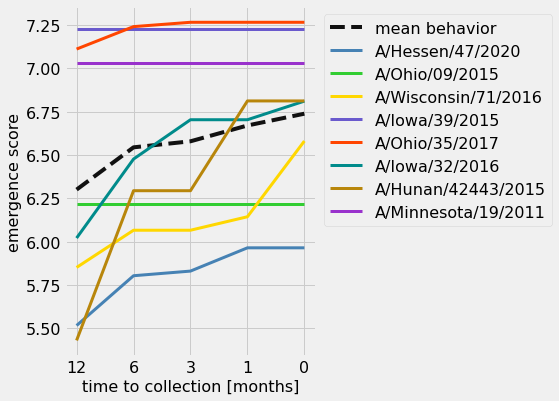

In [74]:
colors = [
    "#111111",  # Tomato
    "#4682B4",  # Steel Blue
    "#32CD32",  # Lime Green
    "#FFD700",  # Gold
    "#6A5ACD",  # Slate Blue
    "#ff4500",  # Orange Red
    "#008B8B",  # Dark Cyan
    "#B8860B",  # Dark Golden Rod
    "#9932CC"   # Dark Orchid
]
plt.figure(figsize=[4,6])
ax=plt.gca()
df.tail(8).mean().plot(ax=ax,lw=4,style='--k',label='mean behavior')

df.tail(8).T.plot(ax=ax,lw=3)
customize_plot(ax,color_palette=colors)
plt.savefig('../../tex/overleaf/Figures/variant.png', bbox_inches='tight', transparent=True)
import tikzplotlib

tikzplotlib.save('../../tex/overleaf/Figures/variant.tex')

In [22]:
df

,12,6,3,1,0
A/Bretagne/24241/2021,4.225531,4.225531,4.225531,4.225531,4.225531
A/Netherlands/3315/2016,3.303468,4.101500,4.101500,4.101500,4.331386
A/Wisconsin/03/2021,5.881352,5.893916,5.893916,5.893916,5.893916
A/Netherlands/10370-1b/2020,5.012770,5.012770,5.012770,5.012770,5.012770
A/California/71/2021,5.286447,5.316394,5.375448,5.550471,5.550471
A/Michigan/383/2018,4.505253,5.203912,6.085678,6.085678,6.085678
A/Ohio/24/2017,7.481834,7.615888,7.615888,7.615888,7.615888
A/Hessen/47/2020,5.517089,5.804336,5.831136,5.965305,5.965305
A/Ohio/09/2015,6.220487,6.220487,6.220487,6.220487,6.220487
A/Wisconsin/71/2016,5.852044,6.066819,6.066819,6.144560,6.581218


In [23]:
# save to table
OUTDIR='../../tex/overleaf/Figures/tabdata/'

In [61]:
mf=pd.read_excel('../irat_enet/data/variant_metadata.xls')
mf=mf.set_index('Isolate_Name').Subtype.reset_index().drop_duplicates().reset_index(drop=True).set_index('Isolate_Name')
df_=mf.join(df).dropna().sort_values('0')
df_=df_[df_.Subtype != 'A / H1']
df_.Subtype = [x[4:] for x in df_.Subtype.values]

data=df_.copy()
#data = data.set_index('strain')
data_=data.sort_values('0',ascending=False).round(2)
data_.index.name='variant strain'
data_=data_.rename(columns={'0': 'at collection','1': '1 month prior','3': '3 month prior','6': '6 month prior','12': '12 months prior'})
data_

from zedstat.textable import textable
textable(data_,
         tabname=OUTDIR+'varianttab1.tex',
         FORMAT='%1.1f',INDEX=True,
         TABFORMAT='L{2in}|L{.6in}|L{.6in}|L{.60in}|L{.6in}|C{.6in}|C{.6in}',LNTERM='\\\\\n',HEADERCOLOR='\\rowcolor{lightgray}')

#from zedstat.textable import textable
#textable(data_,
#         tabname=OUT_DIR+'variant.tex',
#         FORMAT='%1.2f',INDEX=True,
#         TABFORMAT='L{1.95in}|L{.6in}|L{.60in}|L{.6in}|C{.6in}',LNTERM='\\\\\n')

<AxesSubplot:xlabel='0', ylabel='Density'>

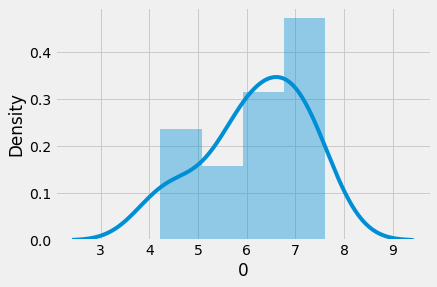

In [25]:
import seaborn as sns
sns.distplot(df['0'])

In [26]:
animal = pd.read_csv('results/animal_predictions/animal.csv')
af=animal['emergence'].values
thresholds=[6,6.5,6.8,7, 7.1]
cmpr={}
for i in thresholds:
    cmpr[i]={'\\% in variants':np.sum(df['0'].values>i)*100/df.index.size,'\\% in animal surveillance':np.sum(af>i)*100/len(af)}
cf=pd.DataFrame(cmpr).round(1)
cf.index.name='emergence score thresholds'
display(cf)
cf.columns=cf.columns.astype(str)

from zedstat.textable import textable
textable(cf,
         tabname=OUTDIR+'variantpc.tex',
         FORMAT='%1.1f',INDEX=True,
         TABFORMAT='L{2.5in}|L{.6in}|L{.60in}|L{.6in}|C{.6in}|C{.6in}',LNTERM='\\\\\n',HEADERCOLOR='\\rowcolor{lightgray}')



! cat ../../tex/overleaf/Figures/tabdata/variantpc.tex

,6.0,6.5,6.8,7.0,7.1
emergence score thresholds,,,,,
\% in variants,60.0,46.7,40.0,26.7,20.0
\% in animal surveillance,69.1,45.5,18.5,6.4,5.6


\begin{tabular}{L{2.5in}|L{.6in}|L{.60in}|L{.6in}|C{.6in}|C{.6in}}\hline
\rowcolor{lightgray} emergence  score  thresholds &6.0&6.5&6.8&7.0&7.1\\\hline
 \%  in  variants &60.0&46.7&40.0&26.7&20.0\\
 \%  in  animal  surveillance &69.1&45.5&18.5&6.4&5.6\\
\hline\end{tabular}


In [27]:
af=animal['emergence_high'].values
thresholds=[7.5,8,8.5]
cmpr={}
for i in thresholds:
    cmpr[i]={'variant':np.sum(dfh['0'].values>i)/dfh.index.size,'animal':np.sum(af>i)/len(af)}
pd.DataFrame(cmpr)

,7.5,8.0,8.5
variant,0.533333,0.40000,0.200000
animal,0.609223,0.29446,0.048788


In [59]:
df_

,Subtype,12,6,3,1,0
A/Bretagne/24241/2021,H1N2,4.225531,4.225531,4.225531,4.225531,4.225531
A/Netherlands/3315/2016,H1N1,3.303468,4.101500,4.101500,4.101500,4.331386
A/Netherlands/10370-1b/2020,H1N1,5.012770,5.012770,5.012770,5.012770,5.012770
A/California/71/2021,H1N2,5.286447,5.316394,5.375448,5.550471,5.550471
A/Wisconsin/03/2021,H1N1,5.881352,5.893916,5.893916,5.893916,5.893916
A/Hessen/47/2020,H1N1,5.517089,5.804336,5.831136,5.965305,5.965305
A/Michigan/383/2018,H1N2,4.505253,5.203912,6.085678,6.085678,6.085678
A/Ohio/09/2015,H1N1,6.220487,6.220487,6.220487,6.220487,6.220487
A/Wisconsin/71/2016,H1N2,5.852044,6.066819,6.066819,6.144560,6.581218
A/Iowa/32/2016,H1N2,6.021642,6.477352,6.704187,6.704187,6.811512


In [44]:
df.sort_values('0')

,12,6,3,1,0
A/Bretagne/24241/2021,4.225531,4.225531,4.225531,4.225531,4.225531
A/Netherlands/3315/2016,3.303468,4.101500,4.101500,4.101500,4.331386
A/Netherlands/10370-1b/2020,5.012770,5.012770,5.012770,5.012770,5.012770
A/California/71/2021,5.286447,5.316394,5.375448,5.550471,5.550471
A/Wisconsin/03/2021,5.881352,5.893916,5.893916,5.893916,5.893916
A/Hessen/47/2020,5.517089,5.804336,5.831136,5.965305,5.965305
A/Michigan/383/2018,4.505253,5.203912,6.085678,6.085678,6.085678
A/Ohio/09/2015,6.220487,6.220487,6.220487,6.220487,6.220487
A/Wisconsin/71/2016,5.852044,6.066819,6.066819,6.144560,6.581218
A/Iowa/32/2016,6.021642,6.477352,6.704187,6.704187,6.811512


In [38]:
mf

,Subtype
Isolate_Name,
A/Hunan/42443/2015-RG,A / H1N1
CNIC-1601(A/Hunan/42443/2015 ),A / H1N1
A/Netherlands/10370-1b/2020,A / H1N1
A/Hunan/42443/2015,A / H1N1
A/Netherlands/3315/2016,A / H1N1
A/Hessen/47/2020,A / H1N1
A/Bretagne/24241/2021,A / H1N2
A/Netherlands/3315/2016,A / H1
A/Minnesota/19/2011,A / H1N2
